In [8]:
import nltk
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer 
stop_words = set(stopwords.words('english'))
def processed_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\w'
C:\Users\DELL\AppData\Local\Temp\ipykernel_19712\1827588063.py:9: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19712\1827588063.py:10: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19712\1827588063.py:14: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\

In [10]:
data['cleaned_tweet'] = data['text'].apply(processed_text)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve added commercials exp...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica didnt today must mean need take ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing


In [11]:
positive_tweets = data[data['airline_sentiment'] == 'positive']['cleaned_tweet']
negative_tweets = data[data['airline_sentiment'] == 'negative']['cleaned_tweet']
neutral_tweets = data[data['airline_sentiment'] == 'neutral']['cleaned_tweet']

In [12]:
tfidf_pos = TfidfVectorizer(max_features=5000)
tfidf_neg = TfidfVectorizer(max_features=5000)
tfidf_neu = TfidfVectorizer(max_features=5000)
tfidf_pos_matrix = tfidf_pos.fit_transform(positive_tweets)
tfidf_neg_matrix = tfidf_neg.fit_transform(negative_tweets)
tfidf_neu_matrix = tfidf_neu.fit_transform(neutral_tweets)

In [13]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=10):
    summed_tfidf = tfidf_matrix.sum(axis=0)
    words_scores = [(word, summed_tfidf[0, idx]) for word, idx in feature_names.items()]
    sorted_words = sorted(words_scores, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]

In [14]:
top_pos_words = get_top_tfidf_words(tfidf_pos_matrix, tfidf_pos.vocabulary_)
top_neg_words = get_top_tfidf_words(tfidf_neg_matrix, tfidf_neg.vocabulary_)
top_neu_words = get_top_tfidf_words(tfidf_neu_matrix, tfidf_neu.vocabulary_)
print("Top Positive Words:", top_pos_words)
print("Top Negative Words:", top_neg_words)
print("Top Neutral Words:", top_neu_words)

Top Positive Words: [('thanks', np.float64(136.02496737600765)), ('thank', np.float64(128.14715382849494)), ('jetblue', np.float64(117.95543341686601)), ('united', np.float64(108.32308063111549)), ('southwestair', np.float64(104.01750316369866)), ('americanair', np.float64(86.25690141404722)), ('usairways', np.float64(73.20051424168796)), ('flight', np.float64(63.17628746764792)), ('great', np.float64(56.01347394091174)), ('virginamerica', np.float64(40.81265048606799))]
Top Negative Words: [('united', np.float64(376.74075230352923)), ('flight', np.float64(376.2303294169673)), ('usairways', np.float64(334.8933054504215)), ('americanair', np.float64(306.7860817175399)), ('southwestair', np.float64(215.47437292371856)), ('jetblue', np.float64(200.4562208858222)), ('get', np.float64(181.1149775620742)), ('cancelled', np.float64(173.43046827461316)), ('service', np.float64(149.7905034554874)), ('hold', np.float64(141.43998242254625))]
Top Neutral Words: [('jetblue', np.float64(133.10562080

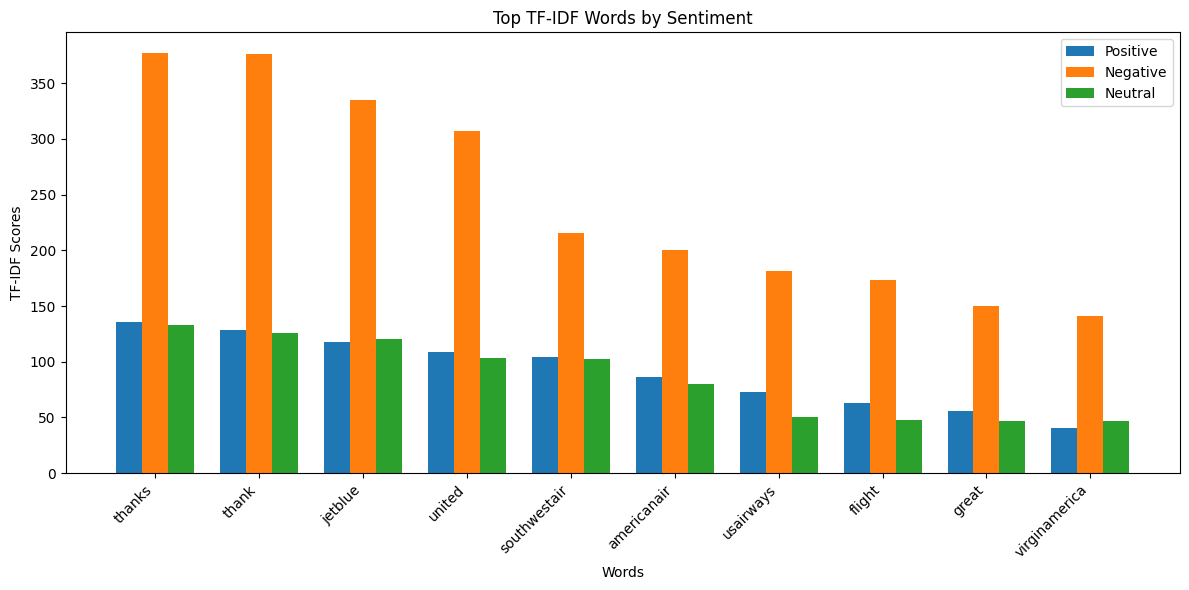

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = [word for word, score in top_pos_words]
y_pos = [score for word, score in top_pos_words]
y_neg = [score for word, score in top_neg_words]
y_neu = [score for word, score in top_neu_words]
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(x))
bar_width = 0.25
plt.bar(x_pos - bar_width, y_pos, bar_width, label='Positive')
plt.bar(x_pos, y_neg, bar_width, label='Negative')
plt.bar(x_pos + bar_width, y_neu, bar_width, label='Neutral')
plt.xlabel('Words')
plt.ylabel('TF-IDF Scores')
plt.title('Top TF-IDF Words by Sentiment')
plt.xticks(x_pos, x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()